# Support Vector Regression

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(dataset)
print(X)
print(y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = np.ravel(sc_y.fit_transform(y.reshape(-1,1)))
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


/Users/habib/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


We perform feature scaling here because the SVR library that we will use doesn't include feature scaling. Notice that we also reshape need to reshape y. StandardScaler needs 2D array while y is 1-dimensional. The reshape function convert it into 2D. However, we will fit y to the regressor which need 1D array, so we flat y back to 1-dimensional using ravel function from numpy.

## Fitting SVR

In [4]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

RBF stands for Radial Basis Function, one of popular kernel used for non-linear problem.

## Visualisation

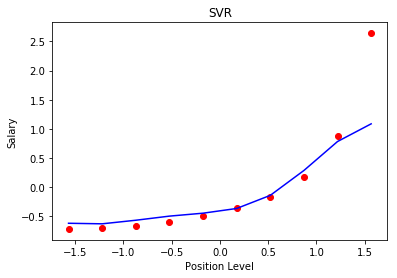

In [6]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Prediction

In [14]:
to_predict = 2.5
to_predict_scaled = sc_X.transform(np.array([[to_predict]]))
y_pred = sc_y.inverse_transform(regressor.predict(to_predict_scaled))
print(y_pred)

[ 78074.30052969]
